In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl
import seaborn as sn
import dataset

In [2]:
# interfacce function to get splited dataset
# resize all audio to (19, 1841) matrix
# 1841 is the max size of Japanese audio
dataset_collection = dataset.getMFCCDatasetRAVDESS(train_size = 0.6, valid_size = 0.2, test_size = 0.2, cut = False, emotion_number = 3, max_len = 1841)

X_train = dataset_collection['X_train']
Y_train = dataset_collection['Y_train']
X_valid = dataset_collection['X_valid']
Y_valid = dataset_collection['Y_valid']
X_test = dataset_collection['X_test']
Y_test = dataset_collection['Y_test']

X_train_norm = dataset_collection['X_train_norm']
X_valid_norm = dataset_collection['X_valid_norm']
X_test_norm = dataset_collection['X_test_norm']

C:\Users\zhuq6\Desktop\cs230-main\dataset.py:49: RuntimeWarning: invalid value encountered in true_divide
  X_train_norm = (X_train - X_train_miu)/X_train_std
C:\Users\zhuq6\Desktop\cs230-main\dataset.py:50: RuntimeWarning: invalid value encountered in true_divide
  X_valid_norm = (X_valid - X_valid_miu)/X_valid_std
C:\Users\zhuq6\Desktop\cs230-main\dataset.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_test_norm = (X_test - X_test_miu)/X_test_std


In [3]:
print(dataset_collection)

{'X_train': array([[[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [3.7116675, 3.486362 , 3.4264927, ..., 3.2235901, 2.9416451,
         2.7886853],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]],

       [[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.

In [4]:
print(X_train.shape)

(287, 1841, 19)


In [5]:
# convert array to tensor
X_train_norm = tf.convert_to_tensor(X_train_norm)
X_valid_norm = tf.convert_to_tensor(X_valid_norm)
X_test_norm = tf.convert_to_tensor(X_test_norm)
Y_train = tf.convert_to_tensor(Y_train)
Y_valid = tf.convert_to_tensor(Y_valid)
Y_test = tf.convert_to_tensor(Y_test)

X_train = tf.convert_to_tensor(X_train)
X_valid = tf.convert_to_tensor(X_valid)
X_test = tf.convert_to_tensor(X_test)

In [12]:
def convolutional_model(input_shape):
        """
        Implements the forward propagation for the model:
        CONV2D -> RELU -> MAXPOOL -> CONV2D -> Softmax -> MAXPOOL -> FLATTEN -> DENSE
        
        Arguments:
        input_mfcc -- input dataset, of shape (input_shape)

        Returns:
        model -- TF Keras model (object containing the information for the entire training process) 
        """

        input_mfcc = tf.keras.Input(shape=input_shape)
        ## CONV1D: 4 filters 8, stride of 1, padding 'SAME'
        Z1 = tfl.Conv1D(filters = 2, kernel_size = 8, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(input_mfcc)
        ## RELU
        A1 = tfl.ReLU()(Z1)
        ## MAXPOOL: window 8, stride 4, padding 'SAME'
        P1 = tfl.MaxPool1D(pool_size = 8, strides = 4, padding='same')(A1)
        
        # D1 = tfl.Dropout(0.2)(P1)

        ## CONV1D: 2 filters 4, stride 1, padding 'SAME'
        Z2 = tfl.Conv1D(filters = 2, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(P1)
        ## RELU
        A2 = tfl.ReLU()(Z2)
        ## MAXPOOL: window 4, stride 2, padding 'SAME'
        P2 = tfl.MaxPool1D(pool_size = 4, strides = 2, padding='same')(A2)

        # D2 = tfl.Dropout(0.2)(P2)

        # ## CONV1D: 2 filters 4, stride 1, padding 'SAME'
        # Z3 = tfl.Conv1D(filters = 2, kernel_size = 4, strides = 2, padding='same', kernel_initializer = 'he_normal', kernel_regularizer = 'L1')(D2)
        # ## RELU
        # A3 = tfl.ReLU()(Z3)
        # ## MAXPOOL: window 4, stride 2, padding 'SAME'
        # P3 = tfl.MaxPool1D(pool_size = 4, strides = 2, padding='same')(A3)

        # D3 = tfl.Dropout(0.2)(P3)

        ## FLATTEN
        F = tfl.Flatten()(P2)
        # D3 = tfl.Dropout(0.2)(F)
        ## Dense layer
        ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
        # Den1 = tfl.Dense(64, activation='ReLU', kernel_regularizer = 'L1')(F)
        outputs = tfl.Dense(3, activation='softmax')(F)
        model = tf.keras.Model(inputs=input_mfcc, outputs=outputs)
        return model


In [29]:
# conv_model = CNN_RAVDESS.CNN.convolutional_model((1841, 19))
conv_model = convolutional_model((1841, 19))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1841, 19)]        0         
                                                                 
 conv1d_10 (Conv1D)          (None, 921, 2)            306       
                                                                 
 re_lu_10 (ReLU)             (None, 921, 2)            0         
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 231, 2)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 116, 2)            18        
                                                                 
 re_lu_11 (ReLU)             (None, 116, 2)            0         
                                                           

In [18]:
print(X_train_norm.shape)

(287, 1841, 19)


In [30]:
history = conv_model.fit(X_train_norm, Y_train, epochs=100, validation_data=(X_valid_norm, Y_valid))

Epoch 1/100
9/9 [==============================] - 1s 70ms/step - loss: 1.4291 - accuracy: 0.4634 - val_loss: 1.4491 - val_accuracy: 0.4526
Epoch 2/100
9/9 [==============================] - 0s 43ms/step - loss: 1.3671 - accuracy: 0.4808 - val_loss: 1.4389 - val_accuracy: 0.4421
Epoch 3/100
9/9 [==============================] - 0s 29ms/step - loss: 1.3402 - accuracy: 0.4983 - val_loss: 1.4210 - val_accuracy: 0.4632
Epoch 4/100
9/9 [==============================] - 0s 45ms/step - loss: 1.3096 - accuracy: 0.5087 - val_loss: 1.3985 - val_accuracy: 0.5053
Epoch 5/100
9/9 [==============================] - 0s 45ms/step - loss: 1.2834 - accuracy: 0.5470 - val_loss: 1.3832 - val_accuracy: 0.4947
Epoch 6/100
9/9 [==============================] - 0s 44ms/step - loss: 1.2625 - accuracy: 0.5679 - val_loss: 1.3768 - val_accuracy: 0.5263
Epoch 7/100
9/9 [==============================] - 0s 43ms/step - loss: 1.2438 - accuracy: 0.5645 - val_loss: 1.3699 - val_accuracy: 0.5263
Epoch 8/100
9/9 [===

9/9 [==============================] - 0s 42ms/step - loss: 0.6736 - accuracy: 0.8571 - val_loss: 1.1257 - val_accuracy: 0.6737
Epoch 60/100
9/9 [==============================] - 0s 42ms/step - loss: 0.6683 - accuracy: 0.8606 - val_loss: 1.1282 - val_accuracy: 0.7053
Epoch 61/100
9/9 [==============================] - 0s 42ms/step - loss: 0.6638 - accuracy: 0.8641 - val_loss: 1.1209 - val_accuracy: 0.6842
Epoch 62/100
9/9 [==============================] - 0s 42ms/step - loss: 0.6587 - accuracy: 0.8676 - val_loss: 1.1245 - val_accuracy: 0.6737
Epoch 63/100
9/9 [==============================] - 0s 44ms/step - loss: 0.6555 - accuracy: 0.8641 - val_loss: 1.1213 - val_accuracy: 0.6842
Epoch 64/100
9/9 [==============================] - 0s 46ms/step - loss: 0.6529 - accuracy: 0.8746 - val_loss: 1.1127 - val_accuracy: 0.6737
Epoch 65/100
9/9 [==============================] - 0s 42ms/step - loss: 0.6490 - accuracy: 0.8641 - val_loss: 1.1216 - val_accuracy: 0.6842
Epoch 66/100
9/9 [========

C:\Users\zhuq6\AppData\Local\Temp\ipykernel_17364\903421272.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\zhuq6\AppData\Local\Temp\ipykernel_17364\903421272.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

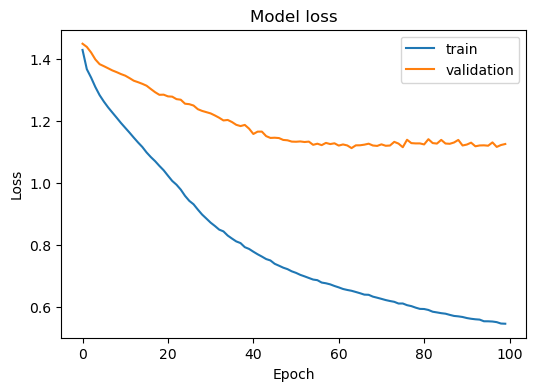

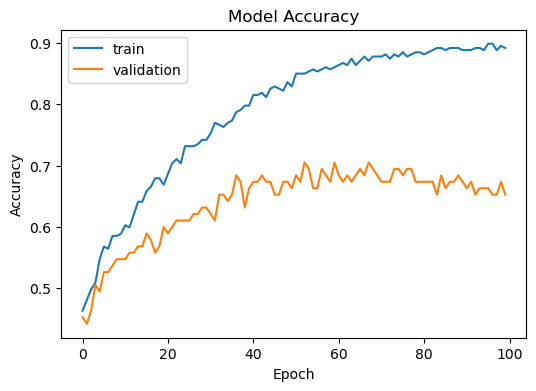

In [31]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

4/4 [==============================] - 0s 5ms/step


[Text(0.5, 23.52222222222222, 'prediction'),
 Text(50.722222222222214, 0.5, 'actual')]

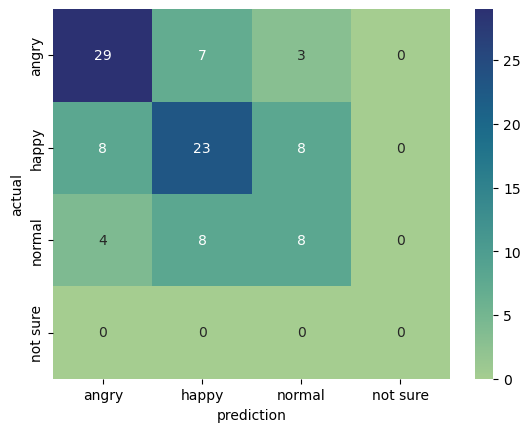

In [32]:
Y_pred = conv_model.predict(X_test)
Y_test_numpy = Y_test.numpy()
emotion_pred = []
emotion_test = []
for i in range(len(Y_pred)):
    if (Y_pred[i][0] > 0.5):
        emotion_pred.append(0) # angry
    elif (Y_pred[i][1] > 0.5):
        emotion_pred.append(1) # happy
    elif (Y_pred[i][2] > 0.5):
        emotion_pred.append(2) # normal
    else:
        emotion_pred.append(3) # not decided

    if (Y_test_numpy[i][0] > 0.5):
        emotion_test.append(0)
    elif (Y_test_numpy[i][1] > 0.5):
        emotion_test.append(1)
    elif (Y_test_numpy[i][2] > 0.5):
        emotion_test.append(2)

emotion_test = tf.convert_to_tensor(emotion_test)
emotion_pred = tf.convert_to_tensor(emotion_pred)

confusion = tf.math.confusion_matrix(emotion_test, emotion_pred, num_classes = 4)

df=pd.DataFrame(confusion.numpy(),index=['angry', 'happy', 'normal', 'not sure'],columns=['angry', 'happy', 'normal', 'not sure'])
confusiton_map = sn.heatmap(df,annot=True, cmap='crest')
confusiton_map.set(xlabel="prediction", ylabel="actual")

Build transfer model

apply it on Japanese dataset

In [33]:
dataset_collection = dataset.getMFCCDataset(train_size = 0.6, valid_size = 0.2, test_size = 0.2, cut = False, max_len = 1841)

jap_X_train = dataset_collection['X_train']
jap_Y_train = dataset_collection['Y_train']
jap_X_valid = dataset_collection['X_valid']
jap_Y_valid = dataset_collection['Y_valid']
jap_X_test = dataset_collection['X_test']
jap_Y_test = dataset_collection['Y_test']

jap_X_train_norm = dataset_collection['X_train_norm']
jap_X_valid_norm = dataset_collection['X_valid_norm']
jap_X_test_norm = dataset_collection['X_test_norm']

# convert array to tensor
jap_X_train_norm = tf.convert_to_tensor(jap_X_train_norm)
jap_X_valid_norm = tf.convert_to_tensor(jap_X_valid_norm)
jap_X_test_norm = tf.convert_to_tensor(jap_X_test_norm)
jap_Y_train = tf.convert_to_tensor(jap_Y_train)
jap_Y_valid = tf.convert_to_tensor(jap_Y_valid)
jap_Y_test = tf.convert_to_tensor(jap_Y_test)

jap_X_train = tf.convert_to_tensor(jap_X_train)
jap_X_valid = tf.convert_to_tensor(jap_X_valid)
jap_X_test = tf.convert_to_tensor(jap_X_test)

C:\Users\zhuq6\Desktop\cs230-main\dataset.py:49: RuntimeWarning: invalid value encountered in true_divide
  X_train_norm = (X_train - X_train_miu)/X_train_std
C:\Users\zhuq6\Desktop\cs230-main\dataset.py:50: RuntimeWarning: invalid value encountered in true_divide
  X_valid_norm = (X_valid - X_valid_miu)/X_valid_std
C:\Users\zhuq6\Desktop\cs230-main\dataset.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_test_norm = (X_test - X_test_miu)/X_test_std


In [34]:
jap_X_test.shape

TensorShape([180, 1841, 19])

In [35]:
def transfer_model(japanese_input_size):
    conv_model.trainable = False
    inputs = tf.keras.Input(japanese_input_size)
    
    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = conv_model(inputs, training=False) 
    
    x = tf.keras.layers.Reshape((1,3))(x)
    # # add the new Binary classification layers
    # # use global avg pooling to summarize the info in each channel
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    # # include dropout with probability of 0.2 to avoid overfitting
    # x = tf.keras.layers.Dropout(0.2)(x)
    # # use a prediction layer with three neuron (as three emotions in Japanese dataset)
    outputs = tf.keras.layers.Dense(3)(x)
    
    
    model = tf.keras.Model(inputs, outputs)

    return model

In [36]:
base_learning_rate = 0.01
jap_transfer_model = transfer_model((1841, 19))
jap_transfer_model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
jap_transfer_model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1841, 19)]        0         
                                                                 
 model_5 (Functional)        (None, 3)                 675       
                                                                 
 reshape (Reshape)           (None, 1, 3)              0         
                                                                 
 global_average_pooling1d (G  (None, 3)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
Total params: 687
Trainable params: 12
Non-trainable params: 675
____________________________________________________________

C:\Users\zhuq6\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [37]:
jap_history = jap_transfer_model.fit(jap_X_train_norm, jap_Y_train, epochs=100, validation_data=(jap_X_valid_norm, jap_Y_valid))

Epoch 1/100
17/17 [==============================] - 1s 18ms/step - loss: 4.4513 - accuracy: 0.2111 - val_loss: 4.6104 - val_accuracy: 0.1889
Epoch 2/100
17/17 [==============================] - 0s 6ms/step - loss: 4.8525 - accuracy: 0.3333 - val_loss: 4.3820 - val_accuracy: 0.2778
Epoch 3/100
17/17 [==============================] - 0s 6ms/step - loss: 5.2711 - accuracy: 0.3278 - val_loss: 4.9624 - val_accuracy: 0.2167
Epoch 4/100
17/17 [==============================] - 0s 6ms/step - loss: 5.2409 - accuracy: 0.2519 - val_loss: 4.8010 - val_accuracy: 0.1333
Epoch 5/100
17/17 [==============================] - 0s 6ms/step - loss: 4.9796 - accuracy: 0.2185 - val_loss: 4.4144 - val_accuracy: 0.1333
Epoch 6/100
17/17 [==============================] - 0s 6ms/step - loss: 3.8796 - accuracy: 0.2037 - val_loss: 1.7123 - val_accuracy: 0.1333
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 1.7778 - accuracy: 0.1722 - val_loss: 1.2542 - val_accuracy: 0.1333
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 0s 6ms/step - loss: 4.7624 - accuracy: 0.1111 - val_loss: 5.1073 - val_accuracy: 0.1111
Epoch 60/100
17/17 [==============================] - 0s 6ms/step - loss: 4.7915 - accuracy: 0.1111 - val_loss: 5.1982 - val_accuracy: 0.1111
Epoch 61/100
17/17 [==============================] - 0s 6ms/step - loss: 4.8218 - accuracy: 0.1111 - val_loss: 5.2018 - val_accuracy: 0.1111
Epoch 62/100
17/17 [==============================] - 0s 6ms/step - loss: 4.7906 - accuracy: 0.1111 - val_loss: 5.2594 - val_accuracy: 0.1111
Epoch 63/100
17/17 [==============================] - 0s 6ms/step - loss: 4.7902 - accuracy: 0.1111 - val_loss: 5.2591 - val_accuracy: 0.1111
Epoch 64/100
17/17 [==============================] - 0s 6ms/step - loss: 4.7895 - accuracy: 0.1111 - val_loss: 5.2580 - val_accuracy: 0.1111
Epoch 65/100
17/17 [==============================] - 0s 6ms/step - loss: 4.8193 - accuracy: 0.1111 - val_loss: 5.2574 - val_accuracy: 0.1111
Epoch 

C:\Users\zhuq6\AppData\Local\Temp\ipykernel_17364\689781823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\zhuq6\AppData\Local\Temp\ipykernel_17364\689781823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

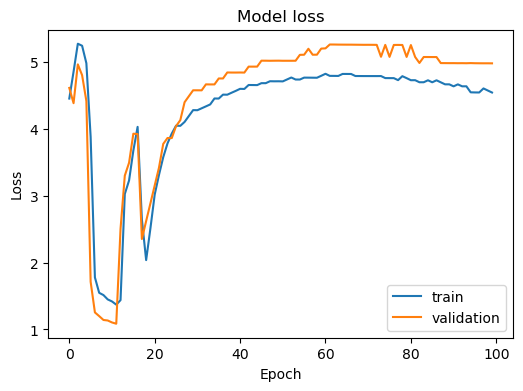

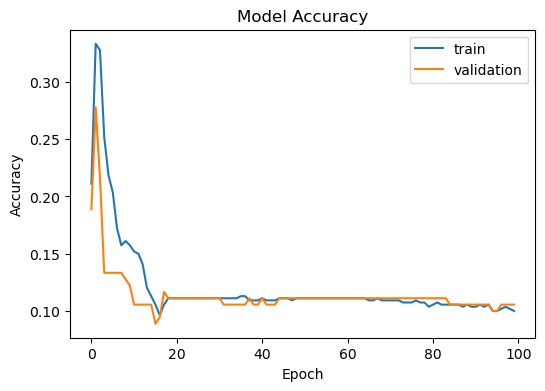

In [38]:
df_loss_acc = pd.DataFrame(jap_history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

Fine tune

In [39]:
# the 2nd layer is CNN layer in conv_model
base_conv_model = jap_transfer_model.layers[1]
base_conv_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_conv_model.layers))

# Fine-tune from this layer onwards
# total layer number in conv_model is 9
fine_tune_at = 6

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_conv_model.layers[:fine_tune_at]:
    layer.trainable = False

jap_transfer_model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.1 * base_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
jap_transfer_model.summary()

Number of layers in the base model:  9
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1841, 19)]        0         
                                                                 
 model_5 (Functional)        (None, 3)                 675       
                                                                 
 reshape (Reshape)           (None, 1, 3)              0         
                                                                 
 global_average_pooling1d (G  (None, 3)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 3)                 12        
                                                                 
Total params: 687
Trainable params: 363
Non-trainable params: 324
____________________

C:\Users\zhuq6\.conda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [40]:
jap_transfer_history = conv_model.fit(jap_X_train_norm, jap_Y_train, epochs=50, validation_data=(jap_X_valid_norm, jap_Y_valid))

Epoch 1/50
17/17 [==============================] - 1s 46ms/step - loss: 1.9078 - accuracy: 0.4759 - val_loss: 1.3226 - val_accuracy: 0.5667
Epoch 2/50
17/17 [==============================] - 1s 35ms/step - loss: 1.2218 - accuracy: 0.6074 - val_loss: 1.0739 - val_accuracy: 0.6333
Epoch 3/50
17/17 [==============================] - 1s 40ms/step - loss: 0.9798 - accuracy: 0.6815 - val_loss: 0.9520 - val_accuracy: 0.6556
Epoch 4/50
17/17 [==============================] - 1s 43ms/step - loss: 0.8677 - accuracy: 0.7130 - val_loss: 0.8653 - val_accuracy: 0.6778
Epoch 5/50
17/17 [==============================] - 1s 43ms/step - loss: 0.7924 - accuracy: 0.7222 - val_loss: 0.7917 - val_accuracy: 0.6944
Epoch 6/50
17/17 [==============================] - 1s 40ms/step - loss: 0.7397 - accuracy: 0.7593 - val_loss: 0.7413 - val_accuracy: 0.7222
Epoch 7/50
17/17 [==============================] - 1s 41ms/step - loss: 0.7033 - accuracy: 0.7593 - val_loss: 0.6999 - val_accuracy: 0.7444
Epoch 8/50
17

C:\Users\zhuq6\AppData\Local\Temp\ipykernel_17364\3055833928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\zhuq6\AppData\Local\Temp\ipykernel_17364\3055833928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

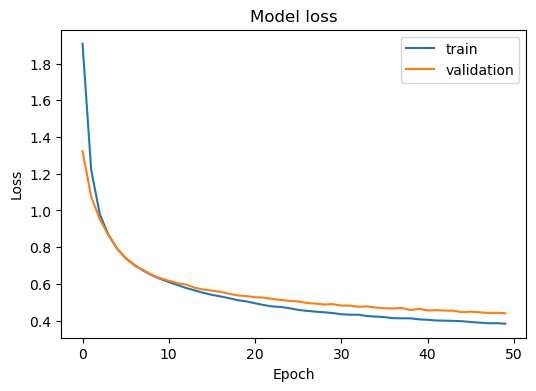

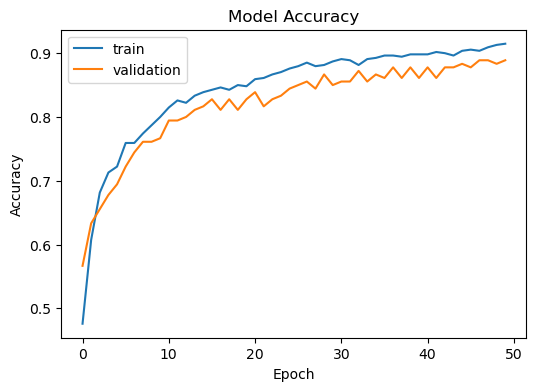

In [41]:
df_loss_acc = pd.DataFrame(jap_transfer_history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')

6/6 [==============================] - 0s 3ms/step


[Text(0.5, 23.52222222222222, 'prediction'),
 Text(50.722222222222214, 0.5, 'actual')]

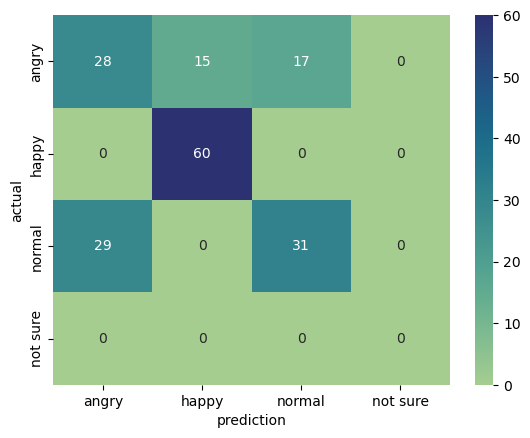

In [42]:
jap_Y_pred = conv_model.predict(jap_X_test)
jap_Y_test_numpy = jap_Y_test.numpy()
jap_emotion_pred = []
jap_emotion_test = []
for i in range(len(jap_Y_pred)):
    if (jap_Y_pred[i][0] > 0.5):
        jap_emotion_pred.append(0) # angry
    elif (jap_Y_pred[i][1] > 0.5):
        jap_emotion_pred.append(1) # happy
    elif (jap_Y_pred[i][2] > 0.5):
        jap_emotion_pred.append(2) # normal
    else:
        jap_emotion_pred.append(3) # not decided

    if (jap_Y_test_numpy[i][0] > 0.5):
        jap_emotion_test.append(0)
    elif (jap_Y_test_numpy[i][1] > 0.5):
        jap_emotion_test.append(1)
    elif (jap_Y_test_numpy[i][2] > 0.5):
        jap_emotion_test.append(2)

jap_emotion_test = tf.convert_to_tensor(jap_emotion_test)
jap_emotion_pred = tf.convert_to_tensor(jap_emotion_pred)

jap_confusion = tf.math.confusion_matrix(jap_emotion_test, jap_emotion_pred, num_classes = 4)

jap_df=pd.DataFrame(jap_confusion.numpy(),index=['angry', 'happy', 'normal', 'not sure'],columns=['angry', 'happy', 'normal', 'not sure'])
confusiton_map = sn.heatmap(jap_df,annot=True, cmap='crest')
confusiton_map.set(xlabel="prediction", ylabel="actual")